<a href="https://colab.research.google.com/github/AlpacaJake/OpenProject/blob/master/InfLearn_Lab11_4_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNist sample

In [0]:
#Lab 11 MNist and Deep Learning CNN
import tensorflow as tf

from tensorflow.examples.tutorials.mnist import input_data

tf.set_random_seed(777)

In [0]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at : {}'.format(device_name))

Found GPU at : /device:GPU:0


In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

learning_rate = 0.001
training_epochs = 15
batch_size = 100

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
class Model:
  def __init__(self, sess, name):
    self.sess = sess
    self.name = name
    self._build_net()

  def _build_net(self):
    with tf.device('/device:GPU:0'):
      with tf.variable_scope(self.name):
        #dropout rate(keep_prob) 0.7 ~0.5 on training, but should be 1 for testing
        self.training = tf.placeholder(tf.bool)
        # input X = 28x28x1 = 784
        self.X = tf.placeholder(tf.float32, [None, 784])

        #image 28x28x1 
        X_img = tf.reshape(self.X, [-1,28,28,1])
        self.Y = tf.placeholder(tf.float32, [None, 10])

        #convolution layer #1
        conv1 = tf.layers.conv2d(inputs=X_img, filters=32, kernel_size=[3,3], padding="SAME", activation=tf.nn.relu)

        #Pooling Layer #1
        pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2,2], padding="SAME", strides=2)

        dropout1 = tf.layers.dropout(inputs=pool1, rate=0.3, training=self.training)

        #convolution layer #2
        conv2 = tf.layers.conv2d(inputs=dropout1, filters=64, kernel_size=[3,3], padding="SAME", activation=tf.nn.relu)

        pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2,2], padding="SAME", strides=2)
        dropout2 = tf.layers.dropout(inputs=pool2, rate=0.3, training=self.training)

        #convolution layer #3
        conv3 = tf.layers.conv2d(inputs=dropout2, filters=128, kernel_size=[3,3], padding="SAME", activation=tf.nn.relu)
        pool3 = tf.layers.max_pooling2d(inputs=conv3, pool_size=[2,2], padding="SAME", strides=2)
        dropout3 = tf.layers.dropout(inputs=pool3, rate=0.3, training=self.training)

        # FC layer
        flat = tf.reshape(dropout3, [-1, 128*4*4])
        dense4 = tf.layers.dense(inputs=flat, units=625, activation=tf.nn.relu)
        dropout4 = tf.layers.dropout(inputs=dense4, rate=0.5, training=self.training)

        # Logits layer FC 625 -> 10 outputs
        self.logits = tf.layers.dense(inputs=dropout4, units=10)

      # define cost/loss & optimizer
      self.cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=self.logits, labels=self.Y))
      self.optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(self.cost)

      correct_prediction = tf.equal(tf.argmax(self.logits, 1), tf.argmax(self.Y, 1))
      self.accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

  def predict(self, x_test, training=False):
    with tf.device('device:GPU:0'):
      return self.sess.run(self.logits, feed_dict={self.X: x_test, self.training: training})

  def get_accuracy(self, x_test, y_test, training=False):
    with tf.device('device:GPU:0'):
      return self.sess.run(self.accuracy, feed_dict={self.X: x_test, self.Y: y_test, self.training: training})

  def train(self, x_data, y_data, training=True):
    with tf.device('device:GPU:0'):
      return self.sess.run([self.cost,self.optimizer], feed_dict={self.X: x_data, self.Y: y_data, self.training: training})

#initialize
sess = tf.Session()
m1 = Model(sess, "m1")                               

sess.run(tf.global_variables_initializer())

print("Learning Started")

for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = int(mnist.train.num_examples / batch_size)

  for i in range(total_batch):
    batch_xs, batch_ys = mnist.train.next_batch(batch_size)
    c, _ = m1.train(batch_xs, batch_ys)
    avg_cost += c / total_batch
  
  print('Epoch:', '%04d' % (epoch + 1), 'cost=','{:.9f}'.format(avg_cost))

print('Learning Finished')




Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.MaxPooling2D instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Learning Started
Epoch: 0001 cost= 0.282718426
Epoch: 0002 cost= 0.085957146
Epoch: 0003 cost= 0.067072744
Epoch: 0004 cost= 0.056045064
Epoch: 0005 cost= 0.049121193
Epoch: 0006 cost= 0.044195341
Epoch: 0007 cost= 0.041134759
Epoch: 0008 cost= 0.038912829
Epoch: 0009 cost= 0.035223572
Epoch: 0010 cost= 0.032629736
Epoch: 0011 cost= 0.032443954
Epoch: 0012 cost= 0.030733159
Epoch: 0013 cost= 0.030296249
Epoch: 0014 cost= 0.027150772
Epoch: 0015 cost= 0.027185443
Learning Finished


TypeError: ignored

In [0]:
print('Accuracy:', m1.get_accuracy(mnist.test.images, mnist.test.labels))

Accuracy: 0.9937


Label:  [0]
Prediction:  [0]


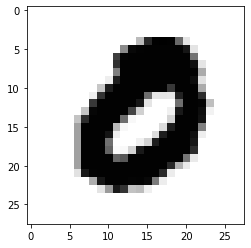

In [0]:
import matplotlib.pyplot as plt
import random
%matplotlib inline
training = 0

r = random.randint(0, mnist.test.num_examples - 1)
print("Label: ", sess.run(tf.argmax(mnist.test.labels[r:r + 1], 1)))
print("Prediction: ", sess.run(tf.argmax(m1.logits, 1), feed_dict={m1.X: mnist.test.images[r:r + 1], m1.training: training}))

plt.imshow(mnist.test.images[r:r + 1].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()